<font color="navyblue">
<center>
<h1>Cross-Validation for Model Selection</h1>

<h2>Practical Lab 5 </h2><center></font>
Submitted by Beena Kurian(student ID: 8946601)


<font color="navyblue">
<h3>OBJECTIVES</h3>
</font>

*  Perform cross-validation on nine polynomial models, ranging from degree 0 to 8.
* Construct a table summarizing the cross-validation results.
* Compute the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model and Calculate the mean value and standard deviation of these metrics from the cross-validation. 
* Identification of the Best Model
* Additional analysis and interpretation of the models' performances. 

In [1]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split 


<font color="navyblue">
<h4>1. GET THE DATA</h4>
</font>

From sklearn import datasets and then load diabetes dataset

In [2]:

# to load the diabetes dataset from scikit-learn while simultaneously splitting it into two parts:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=True)

# independent variables X
X = diabetes_X

# dependent variable y
y = diabetes_y

In [3]:
#To display few rows of diabetes_X 
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
#To display few rows of diabetes_y 
print(diabetes_y.head())

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [5]:
# Train and Test data split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

<font color="navyblue">
<h4>2. RUN MULTIVARIATE POLYNOMIAL REGRESSION OF 0-8 DEGREE ON ALL VARIABLES</h4>
</font>

In [6]:
model = {}
polynomial={}
X_train_poly={}

# Function to perform polynomial regression and cross-validation
def perform_poly_regression(degree,bias):
    polynomial[degree] = PolynomialFeatures(degree=degree,include_bias=bias)
    X_train_poly[degree] = polynomial[degree].fit_transform(X_train)
    
    

    model[degree] = LinearRegression()

    # Define neeeded metrics for cross-validation
    metrics_needed = {
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mape': make_scorer(mean_absolute_percentage_error)
    }

    # Perform cross-validation
    cv_results = cross_validate(model[degree], X_train_poly[degree], y_train, cv=10, scoring=metrics_needed)
    
    # Calculate mean scores and standard deviation of r2, mae, and mape
    mean_r2 = np.mean(cv_results['test_r2'])
    std_r2 = np.std(cv_results['test_r2'])

    mean_mae = np.mean(cv_results['test_mae'])
    std_mae = np.std(cv_results['test_mae'])

    mean_mape = np.mean(cv_results['test_mape'])
    std_mape = np.std(cv_results['test_mape'])

    return degree, mean_r2, std_r2, mean_mae, std_mae, mean_mape, std_mape

# Create lists to store results
metrics = []

# Iterate through polynomial degrees and perform cross-validation
degree, mean_r2, std_r2, mean_mae, std_mae, mean_mape, std_mape= perform_poly_regression(0,True)
metrics.append([degree, mean_r2, std_r2, mean_mae, std_mae, mean_mape, std_mape])
for degree in range(1,9):
    degree, mean_r2, std_r2, mean_mae, std_mae, mean_mape, std_mape= perform_poly_regression(degree,False)
    metrics.append([degree, mean_r2, std_r2, mean_mae, std_mae, mean_mape, std_mape])

<font color="navyblue">
<H4>3. A TABLE SUMMARIZING THE CROSS VALIDATION RESULTS</H4>
</font>

Compare the 9 models using the metrics:
* R-squared
* MAPE 
* MAE. 

In [7]:
# Create a DataFrame to display the results
eval_metric_df = pd.DataFrame(metrics, columns=['polynomial_degree', 'mean_r_squared',' std_dev_r_squared', 'mean_MAE',' std_dev_MAE',  'mean_MAPE', ' std_dev_MAPE', ])

# Display the results
print(eval_metric_df.to_string(index=False))


 polynomial_degree  mean_r_squared   std_dev_r_squared   mean_MAE   std_dev_MAE  mean_MAPE   std_dev_MAPE
                 0       -0.027099            0.028614  66.967751      7.115587   0.639572       0.095221
                 1        0.467490            0.104420  45.448591      3.519473   0.415324       0.053124
                 2        0.389017            0.146398  47.528385      5.663113   0.420030       0.036204
                 3     -141.508057          158.849276 348.690019    121.574460   2.579619       0.873699
                 4      -28.578060           30.692642 246.103838     60.754057   2.047501       0.660156
                 5      -24.551828           22.289902 237.152765     54.032541   1.957909       0.580293
                 6      -24.546701           22.276316 237.142649     54.043169   1.957792       0.580303
                 7      -24.544828           22.271299 237.139795     54.039036   1.957754       0.580251
                 8      -24.544826           2

<font color="navyblue">
<H4>4. IDENTIFICATION OF THE BEST MODEL & REASONS FOR CHOOSING THE MODEL</H4>
</font>

* I choose second model(polynomial with degree 1) as the best model.
* Reason: 
     * When I compared the R-squared, MAE, MAPE of all the 9 models, Model with degree 1 exhibited the highest r-squared value and lowest MAPE and MAE values. 
     * -----------BEST MODEL-------:
     * Polynomial Degree	: 1
     * Mean R-Squared	: 0.467490, this model perform 46.75 % better.
     * Mean MAE	: 45.448591, this model have mean absolute error 45.45, which is less compared to other models.
     * Mean MAPE    : 0.415324, this model have mean absolute percentage error of 41.53%, which is less compared to other models.

<font color="navyblue">
<H4>4. ADDITIONAL ANALYSIS & INTERPRETATION OF THE MODELS' PERFORMANCES</H4>
</font>

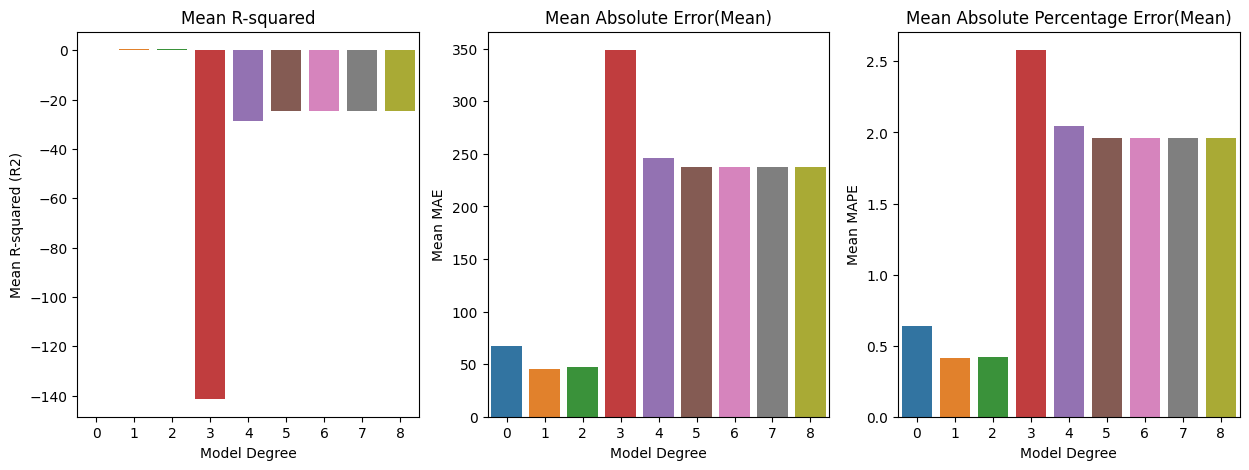

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

polydeg = eval_metric_df['polynomial_degree']
r2 = eval_metric_df['mean_r_squared']
mae = eval_metric_df['mean_MAE']
mape = eval_metric_df['mean_MAPE']

# Plot R2 scores
sns.barplot(x=polydeg, y=r2, ax=axes[0])

axes[0].set_xlabel('Model Degree')
axes[0].set_ylabel('Mean R-squared (R2)')
axes[0].set_title('Mean R-squared')

# Plot MAE values
sns.barplot(x=polydeg, y=mae, ax=axes[1])
axes[1].set_xlabel('Model Degree')
axes[1].set_ylabel('Mean MAE')
axes[1].set_title('Mean Absolute Error(Mean)')


# Plot MAPE values
sns.barplot(x=polydeg, y=mape, ax=axes[2])
axes[2].set_xlabel('Model Degree')
axes[2].set_ylabel('Mean MAPE')
axes[2].set_title('Mean Absolute Percentage Error(Mean)')

# Show the plots
plt.show()


Polynomial Degree 1:
* This model demonstrates a good fit with high R-squared and lower error metrics.

Polynomial Degree 2:
* While the R-squared is slightly lower than the degree 1 model, it still indicates a reasonably good fit, and the error metrics are acceptable.

Polynomial Degree 3 to 8:
* These models perform very poorly, with negative R-squared values and extremely high error metrics. 

Polynomial Degree 0:
* Not a good fit, with R-squared negative and nearly zero and high error metrics than model with degree 1 and 2.


### FINAL PERFORMANCE EVALUATION USING TEST DATA

In [9]:

# performance evaluation function
def evaluate_performance(y1,y2):
    print("R- Squared : ",round(r2_score(y1,y2),2))
    print("Mean Absolute Error:",round(mean_absolute_error(y1, y2),2))
    print("Mean Absolute Percentage error:", round(mean_absolute_percentage_error(y1, y2),2))

X_test_poly = polynomial[1].transform(X_test)    
model[1].fit(X_train_poly[1], y_train)
y_test_pred =model[1].predict(X_test_poly)
evaluate_performance(y_test,y_test_pred)

R- Squared :  0.44
Mean Absolute Error: 41.97
Mean Absolute Percentage error: 0.32
